In [1]:
# Set up Dependencies
from progress.bar import IncrementalBar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import nltk
import json
import csv
import sys
import os
from scipy.stats import linregress
from pprint import pprint

In [2]:
# read the data back into the dataframe from the csv file
input_data_file = os.path.join('data_files','good_merged_data.csv')

# write the DataFrame data to the csv file
movie_df = pd.read_csv(input_data_file)

movie_df.head()

,Title,Year,Rated,Released,Runtime,Genre,Language,Awards,imdbRating,imdbVotes,imdbID,Type,Production,Budget,Revenue,ROI%
0,Vulgar,2000,R,26 Apr 2002,87,"Crime, Drama, Thriller",English,NaN,5.3,"3,876",tt0120467,movie,Lions Gate Films,120000,14904,-87.58
1,Out of the Furnace,2013,R,06 Dec 2013,116,"Action, Crime, Drama, Thriller",English,2 wins & 9 nominations.,6.8,"103,339",tt1206543,movie,Relativity Media,22000000,15400000,-30.00
2,Coyote Ugly,2000,PG-13,04 Aug 2000,100,"Comedy, Drama, Music, Romance",English,4 wins & 8 nominations.,5.7,"104,644",tt0200550,movie,Buena Vista,45000000,113916474,153.15
3,Parental Guidance,2012,PG,25 Dec 2012,105,"Comedy, Family",English,1 win & 4 nominations.,6.0,"24,453",tt1047540,movie,20th Century Fox,25000000,119772232,379.09
4,Raising Helen,2004,PG-13,28 May 2004,119,"Comedy, Drama, Romance",English,1 nomination.,6.0,"34,868",tt0350028,movie,Buena Vista Pictures,50000000,49718611,-0.56


In [3]:
genres = movie_df['Genre'].to_list()

In [4]:
genres_df = movie_df.copy()
genres_df.drop(columns=['Title','Year','Rated','Released','Runtime','Language','Awards','imdbRating',
                        'imdbVotes','Type','Production','Budget','Revenue'], inplace=True)
genres_df

,Genre,imdbID,ROI%
0,"Crime, Drama, Thriller",tt0120467,-87.58
1,"Action, Crime, Drama, Thriller",tt1206543,-30.00
2,"Comedy, Drama, Music, Romance",tt0200550,153.15
3,"Comedy, Family",tt1047540,379.09
4,"Comedy, Drama, Romance",tt0350028,-0.56
...,...,...,...
581,"Horror, Sci-Fi, Thriller",tt5442430,73.35
582,"Comedy, Crime, Drama",tt1450321,82.29
583,"Biography, Comedy, Crime",tt2461150,16.80
584,"Animation, Adventure, Comedy, Family, Sci-Fi",tt0762125,49.92


In [5]:
genre_list = []
for genre in genres:
    extract = genre.split(',')

    for item in extract:
        item = str(item).replace(' ','')
        if item not in genre_list:
            genre_list.append(item)

In [6]:
dictOfGenres = { i : [] for i in genre_list }
dictOfGenres

{'Crime': [],
 'Drama': [],
 'Thriller': [],
 'Action': [],
 'Comedy': [],
 'Music': [],
 'Romance': [],
 'Family': [],
 'Sport': [],
 'Adventure': [],
 'Sci-Fi': [],
 'History': [],
 'Fantasy': [],
 'Biography': [],
 'Horror': [],
 'Mystery': [],
 'Musical': [],
 'Animation': [],
 'Western': [],
 'War': [],
 'Documentary': []}

In [7]:
for col in genre_list:
    genres_df[col] = ''

genres_df

,Genre,imdbID,ROI%,Crime,Drama,Thriller,Action,Comedy,Music,Romance,...,History,Fantasy,Biography,Horror,Mystery,Musical,Animation,Western,War,Documentary
0,"Crime, Drama, Thriller",tt0120467,-87.58,,,,,,,,...,,,,,,,,,,
1,"Action, Crime, Drama, Thriller",tt1206543,-30.00,,,,,,,,...,,,,,,,,,,
2,"Comedy, Drama, Music, Romance",tt0200550,153.15,,,,,,,,...,,,,,,,,,,
3,"Comedy, Family",tt1047540,379.09,,,,,,,,...,,,,,,,,,,
4,"Comedy, Drama, Romance",tt0350028,-0.56,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,"Horror, Sci-Fi, Thriller",tt5442430,73.35,,,,,,,,...,,,,,,,,,,
582,"Comedy, Crime, Drama",tt1450321,82.29,,,,,,,,...,,,,,,,,,,
583,"Biography, Comedy, Crime",tt2461150,16.80,,,,,,,,...,,,,,,,,,,
584,"Animation, Adventure, Comedy, Family, Sci-Fi",tt0762125,49.92,,,,,,,,...,,,,,,,,,,


In [8]:
for index, row in genres_df.iterrows():
#     print(row['Genre'])
    extract = row['Genre'].split(', ')

    for key in dictOfGenres:
        if key in extract:
            dictOfGenres[key].append(row['ROI%'])
        else:
            dictOfGenres[key].append(None)

In [9]:
height = []
wedge = []
for key in dictOfGenres:
#     print(f'key = {key}, genre_df len = {len(genres_df[key])}, dict len = {len(dictOfGenres[key])}')
    genres_df[key] = dictOfGenres[key]
    height.append(genres_df[key].mean())
    wedge.append(genres_df[key].count())
genres_df

,Genre,imdbID,ROI%,Crime,Drama,Thriller,Action,Comedy,Music,Romance,...,History,Fantasy,Biography,Horror,Mystery,Musical,Animation,Western,War,Documentary
0,"Crime, Drama, Thriller",tt0120467,-87.58,-87.58,-87.58,-87.58,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Action, Crime, Drama, Thriller",tt1206543,-30.00,-30.00,-30.00,-30.00,-30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Comedy, Drama, Music, Romance",tt0200550,153.15,NaN,153.15,NaN,NaN,153.15,153.15,153.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Comedy, Family",tt1047540,379.09,NaN,NaN,NaN,NaN,379.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Comedy, Drama, Romance",tt0350028,-0.56,NaN,-0.56,NaN,NaN,-0.56,NaN,-0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,"Horror, Sci-Fi, Thriller",tt5442430,73.35,NaN,NaN,73.35,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,73.35,NaN,NaN,NaN,NaN,NaN,NaN
582,"Comedy, Crime, Drama",tt1450321,82.29,82.29,82.29,NaN,NaN,82.29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583,"Biography, Comedy, Crime",tt2461150,16.80,16.80,NaN,NaN,NaN,16.80,NaN,NaN,...,NaN,NaN,16.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,"Animation, Adventure, Comedy, Family, Sci-Fi",tt0762125,49.92,NaN,NaN,NaN,NaN,49.92,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,49.92,NaN,NaN,NaN


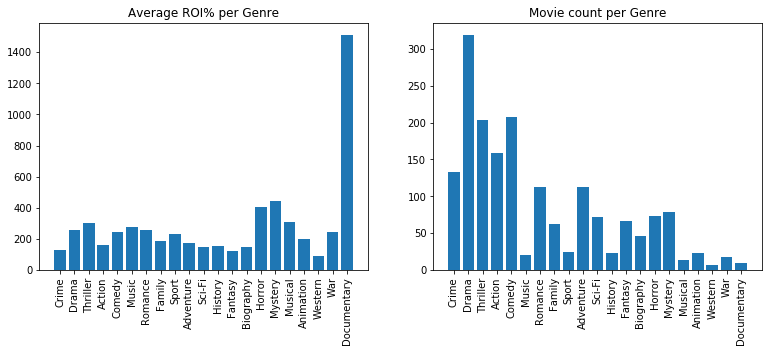

In [29]:
y_pos = np.arange(len(genre_list))
fig = plt.figure(figsize=[20, 10])
gs = plt.GridSpec(2, 3, figure=fig)
# Create bars
ax1 = fig.add_subplot(gs[0, 1])
ax1.bar(y_pos, height)
 
# Create names on the x-axis
ax1.set_xticks(y_pos)
ax1.set_xticklabels(genre_list, rotation='vertical')
ax1.set_title('Average ROI% per Genre')

ax2 = fig.add_subplot(gs[0, 2])
ax2.bar(y_pos, wedge)

ax2.set_xticks(y_pos)
ax2.set_xticklabels(genre_list, rotation='vertical')
ax2.set_title('Movie count per Genre')

# Show graphic
plt.show()
